### Importando bibliotecas

In [28]:
# Bibliotecas principais para análise
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import basedosdados as bd

# Estilo dos gráficos
sns.set_theme(style="whitegrid")




### Carregando arquivo CSV

In [41]:
# Ler arquivo CSV
df = pd.read_csv('enem_2022.csv', sep=';', encoding='latin1', low_memory=False)

# Mostrar as primeiras linhas
df.head()


,NU_INSCRICAO,NU_ANO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,...,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,210057943671,2022,14,M,2,2,1,1,2,1,...,B,A,A,A,A,A,A,A,A,A
1,210057516120,2022,14,M,2,1,1,1,16,1,...,E,E,B,E,B,B,E,B,E,B
2,210057280536,2022,5,F,1,2,1,1,2,1,...,A,A,A,A,A,A,C,A,A,B
3,210055724397,2022,6,M,1,3,1,1,2,1,...,B,A,A,C,A,A,C,B,B,B
4,210055097896,2022,4,M,0,3,1,1,1,1,...,A,A,A,A,A,A,B,A,A,A


### Selecionando colunas importantes

In [42]:
colunas = [
    'NU_INSCRICAO', 'NU_ANO', 'TP_FAIXA_ETARIA', 'TP_SEXO', 'TP_ESTADO_CIVIL',
    'TP_COR_RACA', 'TP_ESCOLA', 'SG_UF_ESC', 'SG_UF_PROVA', 'TP_PRESENCA_MT',
    'NU_NOTA_MT', 'NU_NOTA_REDACAO', 'Q006'
]
df = df[colunas]
print('Colunas selecionadas:')
print(df.columns.tolist())
df.head()

Colunas selecionadas:
['NU_INSCRICAO', 'NU_ANO', 'TP_FAIXA_ETARIA', 'TP_SEXO', 'TP_ESTADO_CIVIL', 'TP_COR_RACA', 'TP_ESCOLA', 'SG_UF_ESC', 'SG_UF_PROVA', 'TP_PRESENCA_MT', 'NU_NOTA_MT', 'NU_NOTA_REDACAO', 'Q006']


,NU_INSCRICAO,NU_ANO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_ESCOLA,SG_UF_ESC,SG_UF_PROVA,TP_PRESENCA_MT,NU_NOTA_MT,NU_NOTA_REDACAO,Q006
0,210057943671,2022,14,M,2,2,1,NaN,DF,0,NaN,NaN,B
1,210057516120,2022,14,M,2,1,1,NaN,DF,0,NaN,NaN,Q
2,210057280536,2022,5,F,1,2,1,NaN,BA,1,565.3,760.0,B
3,210055724397,2022,6,M,1,3,1,NaN,ES,1,416.0,320.0,A
4,210055097896,2022,4,M,0,3,1,NaN,PA,0,NaN,NaN,B


### Deixando os títulos das colunas mais legíveis

In [46]:
df['Sexo'] = df['TP_SEXO'].map({'M': 'Masculino', 'F': 'Feminino'})
df['Presença_MT'] = df['TP_PRESENCA_MT'].map({0: 'Ausente', 1: 'Presente'})
df['Cor_Raca'] = df['TP_COR_RACA'].map({
    0: 'Não declarado', 1: 'Branca', 2: 'Preta',
    3: 'Parda', 4: 'Amarela', 5: 'Indígena', 6: 'Não quis declarar'

})
df['Tipo_Escola'] = df['TP_ESCOLA'].map({1: 'Pública', 2: 'Privada', 3: 'Exterior'})
renda_map = {
    'A': 'Nenhuma renda', 'B': 'Até R$ 998', 'C': 'R$ 998,01 a R$ 1.497',
    'D': 'R$ 1.497,01 a R$ 1.996', 'E': 'R$ 1.996,01 a R$ 2.495',
    'F': 'R$ 2.495,01 a R$ 2.994', 'G': 'R$ 2.994,01 a R$ 3.992',
    'H': 'R$ 3.992,01 a R$ 4.990', 'I': 'R$ 4.990,01 a R$ 5.988',
    'J': 'R$ 5.988,01 a R$ 6.986', 'K': 'R$ 6.986,01 a R$ 7.984',
    'L': 'R$ 7.984,01 a R$ 8.982', 'M': 'R$ 8.982,01 a R$ 9.980',
    'N': 'R$ 9.980,01 a R$ 11.976', 'O': 'R$ 11.976,01 a R$ 14.970',
    'P': 'R$ 14.970,01 a R$ 19.960', 'Q': 'Mais de R$ 19.960'
}
df['Renda'] = df['Q006'].map(renda_map)
df.head()

,NU_INSCRICAO,NU_ANO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_ESCOLA,SG_UF_ESC,SG_UF_PROVA,TP_PRESENCA_MT,NU_NOTA_MT,NU_NOTA_REDACAO,Q006,Sexo,Presença_MT,Cor_Raca,Tipo_Escola,Renda
2,210057280536,2022,5,F,1,2,1,NaN,BA,1,565.3,760.0,B,Feminino,Presente,Preta,Pública,Até R$ 998
3,210055724397,2022,6,M,1,3,1,NaN,ES,1,416.0,320.0,A,Masculino,Presente,Parda,Pública,Nenhuma renda
7,210055778089,2022,6,F,1,2,1,NaN,RJ,1,404.9,440.0,B,Feminino,Presente,Preta,Pública,Até R$ 998
9,210055461467,2022,4,F,1,3,1,NaN,PE,1,435.3,360.0,B,Feminino,Presente,Parda,Pública,Até R$ 998
11,210054972570,2022,2,F,1,1,3,NaN,SE,1,456.8,940.0,B,Feminino,Presente,Branca,Exterior,Até R$ 998


### Limpando dados faltantes

In [44]:
df = df.dropna(subset=['NU_NOTA_MT', 'NU_NOTA_REDACAO'])
print(f'Dados após limpeza: {df.shape[0]} linhas')

Dados após limpeza: 584369 linhas


### Visualizações

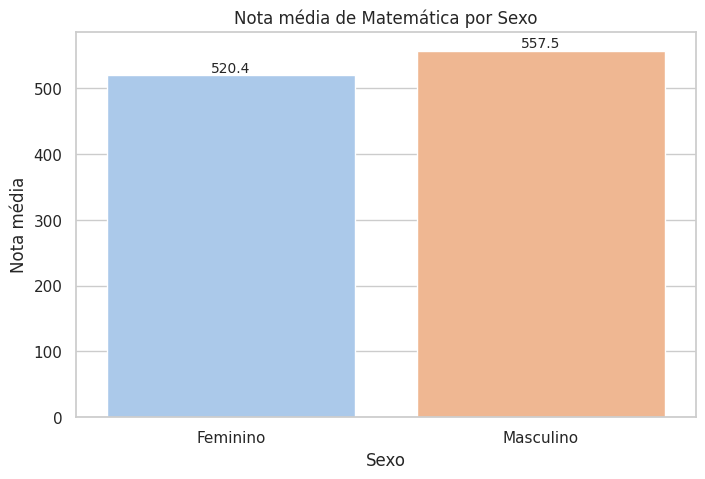

In [48]:
plt.figure(figsize=(8,5))
ax = sns.barplot(data=media_por_sexo, x='Sexo', y='NU_NOTA_MT', palette='pastel')

# Adicionar rótulos nas barras
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f', fontsize=10)

plt.title('Nota média de Matemática por Sexo')
plt.ylabel('Nota média')
plt.xlabel('Sexo')
plt.show()


**Comentário:** Mulheres e homens apresentam desempenho semelhante em matemática, com uma pequena vantagem masculina.
*Essa diferença pode refletir fatores socioculturais relacionados à confiança e incentivo em áreas exatas.*
     

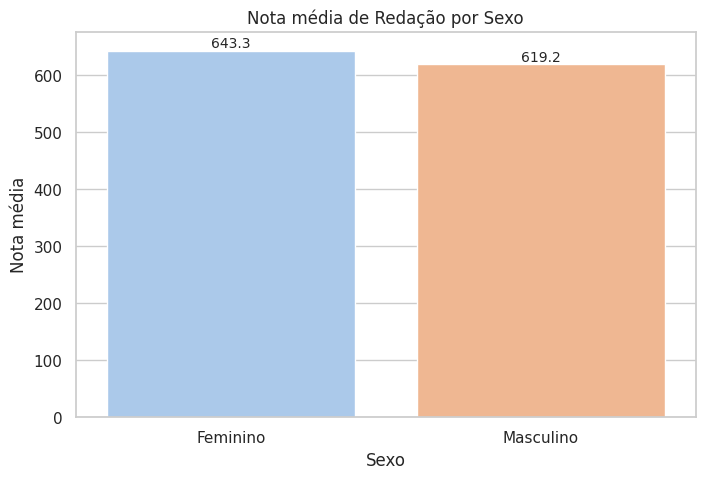

In [77]:
media_redacao_por_sexo = df.groupby('Sexo')['NU_NOTA_REDACAO'].mean().reset_index()

plt.figure(figsize=(8, 5))
ax = sns.barplot(data=media_redacao_por_sexo, x='Sexo', y='NU_NOTA_REDACAO', palette='pastel')

for container in ax.containers:
    ax.bar_label(container, fmt='%.1f', fontsize=10)

plt.title('Nota média de Redação por Sexo')
plt.ylabel('Nota média')
plt.xlabel('Sexo')
plt.show()

**Comentário:** Mulheres apresentam um melhor desempenho em redação, superando os homens.  
Esse resultado pode indicar maior proficiência das candidatas em habilidades de escrita e argumentação.

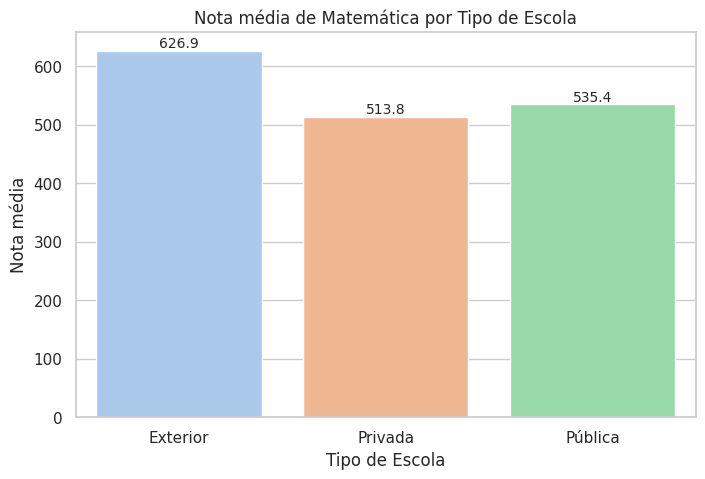

In [50]:
media_por_escola = df.groupby('Tipo_Escola')['NU_NOTA_MT'].mean().reset_index()

plt.figure(figsize=(8,5))
ax = sns.barplot(data=media_por_escola, x='Tipo_Escola', y='NU_NOTA_MT', palette='pastel')

for container in ax.containers:
    ax.bar_label(container, fmt='%.1f', fontsize=10)

plt.title('Nota média de Matemática por Tipo de Escola')
plt.ylabel('Nota média')
plt.xlabel('Tipo de Escola')
plt.show()

**Comentário:** Estudantes do exterior apresentaram a maior nota média em matemática (626,9), seguidos pelos de escola pública (535,4) e privada (513,8).  
      Embora o esperado fosse que estudantes da rede privada tivessem vantagem, esse resultado pode indicar um perfil diferenciado entre os estudantes brasileiros no exterior.


In [62]:
display(media_por_renda[['Renda', 'NU_NOTA_REDACAO']].sort_values(by='NU_NOTA_REDACAO', ascending=False).round(1))



,Renda,NU_NOTA_REDACAO
1,Mais de R$ 19.960,809.0
6,"R$ 14.970,01 a R$ 19.960",799.3
5,"R$ 11.976,01 a R$ 14.970",792.2
15,"R$ 9.980,01 a R$ 11.976",785.8
14,"R$ 8.982,01 a R$ 9.980",778.8
13,"R$ 7.984,01 a R$ 8.982",771.3
12,"R$ 6.986,01 a R$ 7.984",767.1
11,"R$ 5.988,01 a R$ 6.986",759.4
10,"R$ 4.990,01 a R$ 5.988",747.6
9,"R$ 3.992,01 a R$ 4.990",726.9


**Comentário:** A tabela evidencia uma relação direta entre a familiar e o desempenho na redação do ENEM.
Estudantes com **renda mais alta**, especialmente acima de **14 mil reais** alcançam as maiores médias, superando 610 pontos.
Por outro lado, aqueles com nenhuma renda declarada ou renda até R$ 998,00 apresentam médias próximas ou abaixo de 515 pontos.
Dados que reforçam como as **desigualdades socioeconômicas** impactam no acesso à educação de qualidade.

In [74]:
regioes = {
    'Norte': ['AC', 'AP', 'AM', 'PA', 'RO', 'RR', 'TO'],
    'Nordeste': ['AL', 'BA', 'CE', 'MA', 'PB', 'PE', 'PI', 'RN', 'SE'],
    'Centro-Oeste': ['DF', 'GO', 'MT', 'MS'],
    'Sudeste': ['ES', 'MG', 'RJ', 'SP'],
    'Sul': ['PR', 'RS', 'SC']
}

df['Regiao'] = df['SG_UF_PROVA'].map({estado: regiao for regiao, estados in regioes.items() for estado in estados})

media_por_regiao = df.groupby('Regiao')['NU_NOTA_MT'].mean().reset_index()

display(media_por_regiao.round(1))

,Regiao,NU_NOTA_MT
0,Centro-Oeste,532.8
1,Nordeste,516.3
2,Norte,495.7
3,Sudeste,559.9
4,Sul,555.0


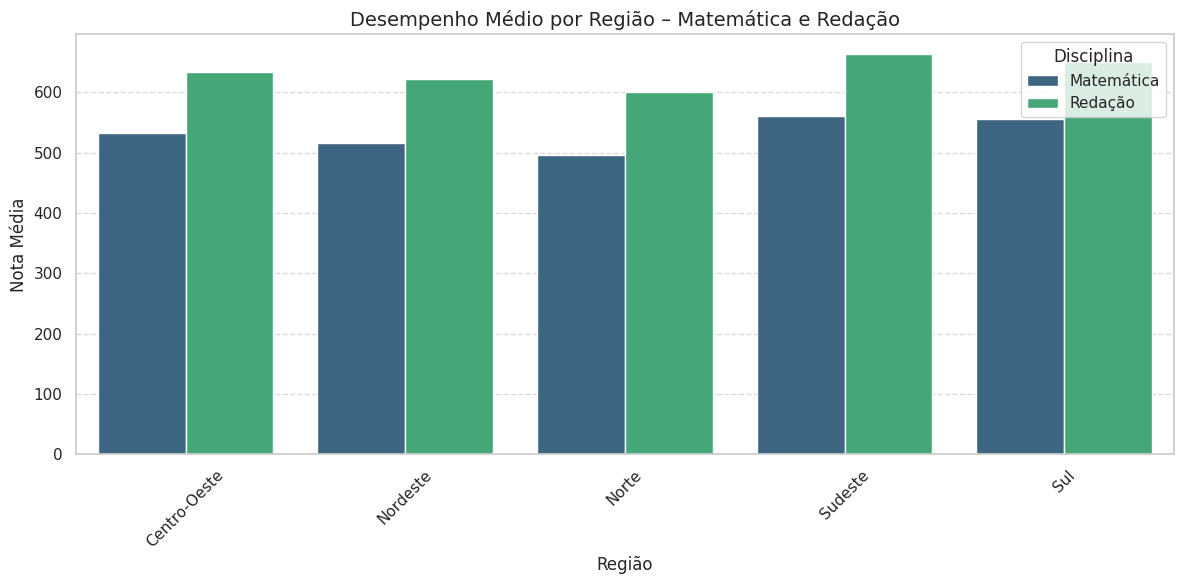

In [83]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


dados = {
    "Região": ["Centro-Oeste", "Nordeste", "Norte", "Sudeste", "Sul"],
    "Matemática": [532.8, 516.3, 495.7, 559.9, 555.0],
    "Redação": [633.9, 622.4, 600.8, 662.7, 649.3]
}


df = pd.DataFrame(dados)

df_melted = df.melt(id_vars="Região", var_name="Disciplina", value_name="Nota Média")


sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))


ax = sns.barplot(data=df_melted, x="Região", y="Nota Média", hue="Disciplina", palette="viridis")


plt.title("Desempenho Médio por Região – Matemática e Redação", fontsize=14)
plt.xticks(rotation=45)
plt.legend(title="Disciplina")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()



**Comentário:** Sudeste e Sul lideram as médias em Matemática e Redação, enquanto Norte e Nordeste apresentam os menores desempenhos, refletindo desigualdades regionais na educação.

In [89]:
media_por_estado = df_filtrado.groupby('SG_UF_PROVA')[['NU_NOTA_REDACAO', 'NU_NOTA_MT']].mean().reset_index()
display(media_por_estado.sort_values(by='NU_NOTA_REDACAO', ascending=False).round(1))

,SG_UF_PROVA,NU_NOTA_REDACAO,NU_NOTA_MT
10,MG,674.3,570.8
7,ES,650.8,553.6
25,SP,649.1,564.5
23,SC,649.1,563.6
22,RS,639.9,551.3
18,RJ,639.6,542.9
24,SE,634.0,511.8
6,DF,633.7,550.8
8,GO,630.2,531.2
17,PR,629.0,554.3


**Comentário:** Os estados de Minas Gerais (MG), Espírito Santo (ES) e São Paulo (SP) lideram com as maiores médias tanto na redação quanto em matemática, indicando melhor desempenho geral. Já Amazonas (AM), Roraima (RR) e Amapá (AP) apresentam as menores médias, destacando disparidades regionais significativas no desempenho dos estudantes.